In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from datetime import datetime
import time
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with open('ks-projects-201612.csv',  encoding="utf8", errors='ignore') as file:
  reader = csv.reader(file)
  data_set = list(reader)
data_set = np.array(data_set)

In [2]:
data_set

array([['ID ', 'name ', 'category ', ..., '', '', ''],
       ['1000002330', 'The Songs of Adelaide & Abullah', 'Poetry', ...,
        '', '', ''],
       ['1000004038', 'Where is Hank?', 'Narrative Film', ..., '', '',
        ''],
       ...,
       ['999986353',
        'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
        'Narrative Film', ..., '', '', ''],
       ['999987933', 'BioDefense Education Kit', 'Technology', ..., '',
        '', ''],
       ['999988282', 'Nou Renmen Ayiti!  We Love Haiti!',
        'Performance Art', ..., '', '', '']], dtype='<U96')

In [3]:
#utils
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [4]:
header = data_set[0]
data_set = data_set[1:len(data_set)] #data set without the header

In [5]:
def clean_data_set(data_set):
    ti = time.time()
    delete_lines =[]
    for i in range (len(data_set)):
        if isfloat(data_set[i,6])==False or data_set[i,9] not in ['failed','successful'] :
            delete_lines.append(i)
    data_set = np.delete(data_set, (delete_lines), axis=0)
    tf=time.time()
    print (tf-ti)
    return data_set

data_set = clean_data_set(data_set)

5.697174787521362


In [6]:
data_set_size = len(data_set)
data_set_size

281302

In [7]:
print(header[3])
print(header[2])

main_category 
category 


In [8]:
data_set_output = data_set[:,9]
data_set_output

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype='<U96')

In [9]:
list_of_output =[]
for j in range (len(data_set_output)):
    if data_set_output[j] not in list_of_output:
        list_of_output.append(data_set_output[j])

list_of_output

['failed', 'successful']

In [10]:
data_set_category = data_set[:,2]
data_set_category

array(['Poetry', 'Narrative Film', 'Music', ..., 'Narrative Film',
       'Technology', 'Performance Art'], dtype='<U96')

In [11]:
list_of_categorie =[]
for j in range (len(data_set_category)):
    if data_set_category[j] not in list_of_categorie:
        list_of_categorie.append(data_set_category[j])

len(list_of_categorie)

158

In [12]:
data_set_main_category = data_set[:,3]
data_set_main_category

array(['Publishing', 'Film & Video', 'Music', ..., 'Film & Video',
       'Technology', 'Art'], dtype='<U96')

In [14]:
list_of_main_categorie =[]
for j in range (len(data_set_category)):
    if data_set_main_category[j] not in list_of_main_categorie:
        list_of_main_categorie.append(data_set_main_category[j])

len(list_of_main_categorie)

15

In [15]:
data_set_currency = data_set[:,4]
data_set_currency

array(['GBP', 'USD', 'USD', ..., 'USD', 'USD', 'USD'], dtype='<U96')

In [16]:
list_of_currency =[]
for j in range (len(data_set_currency)):
    if data_set_currency[j] not in list_of_currency:
        list_of_currency.append(data_set_currency[j])

len(list_of_currency)

13

In [17]:
data_set_country = data_set[:,11]
data_set_country

array(['GB', 'US', 'US', ..., 'US', 'US', 'US'], dtype='<U96')

In [18]:
list_of_country =[]
for j in range (len(data_set_country)):
    if data_set_country[j] not in list_of_country:
        list_of_country.append(data_set_country[j])

len(list_of_country)

22

In [19]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

In [20]:
header

array(['ID ', 'name ', 'category ', 'main_category ', 'currency ',
       'deadline ', 'goal ', 'launched ', 'pledged ', 'state ',
       'backers ', 'country ', 'usd pledged ', '', '', '', ''],
      dtype='<U96')

In [21]:
import time
def build_input_layer(data_set):
    ti = time.time()
    input_data_set = np.zeros((len(data_set),6))
    for i in range (len(data_set)):
        if isfloat(data_set[i,6]):
            input_data_set[i,0] = days_between(data_set[i][7],data_set[i][5]) #time allowed to get the money
            input_data_set[i,1] = float(data_set[i][6]) #the goal
            input_data_set[i,2] = list_of_main_categorie.index(data_set[i][3]) #the main categorie is now encoding with a number beetween 0 and 120
            input_data_set[i,3] = list_of_categorie.index(data_set[i][2]) #the categorie is now encoding with a number
            input_data_set[i,4] = list_of_country.index(data_set[i][11]) # the country encoding with a number
            input_data_set[i,5] = list_of_currency.index(data_set[i][4]) # the currency encoding with a number
    tf = time.time()
    print("temps : " +str(tf-ti))
    return input_data_set   

In [22]:
input_data = build_input_layer(data_set)

temps : 13.194271802902222


41833.055598076084

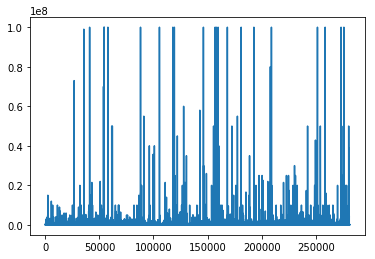

In [23]:
plt.plot(input_data[:,1])
np.mean(input_data[:,1])

In [24]:
#normalize the input_data
#max date time
max_date = max(input_data[:,0])
#max goal 
max_goal =max(input_data[:,1])
#max main categorie
max_main_categorie = max(input_data[:,2])
#max categorie
max_categorie = max(input_data[:,3])
#max country
max_country = max(input_data[:,4])
#max currency
max_currency = max(input_data[:,5])

def normalize_input_data(input_data):
    input_data[:,0] = np.divide(input_data[:,0],max_date)
    input_data[:,1] = np.divide(input_data[:,1],max_goal)
    input_data[:,2] = np.divide(input_data[:,2],max_main_categorie)
    input_data[:,3] = np.divide(input_data[:,3],max_categorie)
    input_data[:,4] = np.divide(input_data[:,4],max_country)
    input_data[:,5] = np.divide(input_data[:,5],max_currency)
    
    return input_data

input_data = normalize_input_data(input_data)

In [25]:
def build_target_layer(data_set):
    target_data = np.zeros(len(data_set))
    for i in range (len(data_set)):
        if data_set[i,9]=='failed':
            target_data[i] = 0
        else :
            target_data[i]= 1
    return target_data
target_data = build_target_layer(data_set)

In [26]:
print (len(target_data))
print (len(input_data))

281302
281302


In [27]:
train_data_set_size = 100000
test_data_set_size = 50000
train_input_data = input_data[0:train_data_set_size]
test_input_data = input_data[train_data_set_size + 1 : train_data_set_size + test_data_set_size]

train_target_data = target_data[0:train_data_set_size]
test_target_data = target_data[train_data_set_size + 1 : train_data_set_size + test_data_set_size]

In [28]:
#build the model in tensorflow
# Graph Inputs
tf_features = tf.placeholder(tf.float32, [None, 6])
tf_targets = tf.placeholder(tf.float32, [None, 1])

#softmax_input = tf.nn.softmax(tf_features)

# Variables 1 layer
w1 = tf.Variable(tf.random_normal([6, 100]))
b1 = tf.Variable(tf.zeros([100]))

#  Operations 1
z1 = tf.matmul(tf_features, w1) + b1
sigmoid1 = tf.math.sigmoid(z1)

#Variable 2 layer

w2 = tf.Variable(tf.random_normal([100, 1]))
b2 = tf.Variable(tf.random_normal([1]))

# Operation 2
z2 = tf.matmul(sigmoid1, w2) + b2
sigmoid2 = tf.nn.sigmoid(z2)

# Error + Train
error = tf.nn.softmax_cross_entropy_with_logits(labels=tf_targets, logits=sigmoid2)
#error = tf.math.abs(tf_targets - softmax2)
train = tf.train.GradientDescentOptimizer(0.5).minimize(error)

# Metrics: Accuracy
# correct_prediction = tf.equal(tf.argmax(softmax1, 1), tf.argmax(tf_targets, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test = np.random.rand(10, 6)
    # Train the model
    epochs = 10
    for e in range(epochs):
        batch_features, batch_targets = train_input_data[0:10], np.reshape(train_target_data[0: 10],(10,1))
        _, error_, z1_ = sess.run([train, error, z1], 
            feed_dict={
            tf_features: batch_features,
            tf_targets: batch_targets})
        #print("error = "+str(error_))
        print("z1 = "+str(z1_))
        print("softmax_1 = "+ str(softmax1_))

In [ ]:
np.shape(np.reshape(train_target_data, (len(train_target_data),1)))